In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
dataset_path = 'owid-energy-data.csv'


In [4]:
df = pd.read_csv(dataset_path)

In [5]:
columnas = list(df.columns)
for col in columnas:
    print(col)

country
year
iso_code
population
gdp
biofuel_cons_change_pct
biofuel_cons_change_twh
biofuel_cons_per_capita
biofuel_consumption
biofuel_elec_per_capita
biofuel_electricity
biofuel_share_elec
biofuel_share_energy
carbon_intensity_elec
coal_cons_change_pct
coal_cons_change_twh
coal_cons_per_capita
coal_consumption
coal_elec_per_capita
coal_electricity
coal_prod_change_pct
coal_prod_change_twh
coal_prod_per_capita
coal_production
coal_share_elec
coal_share_energy
electricity_demand
electricity_demand_per_capita
electricity_generation
electricity_share_energy
energy_cons_change_pct
energy_cons_change_twh
energy_per_capita
energy_per_gdp
fossil_cons_change_pct
fossil_cons_change_twh
fossil_elec_per_capita
fossil_electricity
fossil_energy_per_capita
fossil_fuel_consumption
fossil_share_elec
fossil_share_energy
gas_cons_change_pct
gas_cons_change_twh
gas_consumption
gas_elec_per_capita
gas_electricity
gas_energy_per_capita
gas_prod_change_pct
gas_prod_change_twh
gas_prod_per_capita
gas_produ

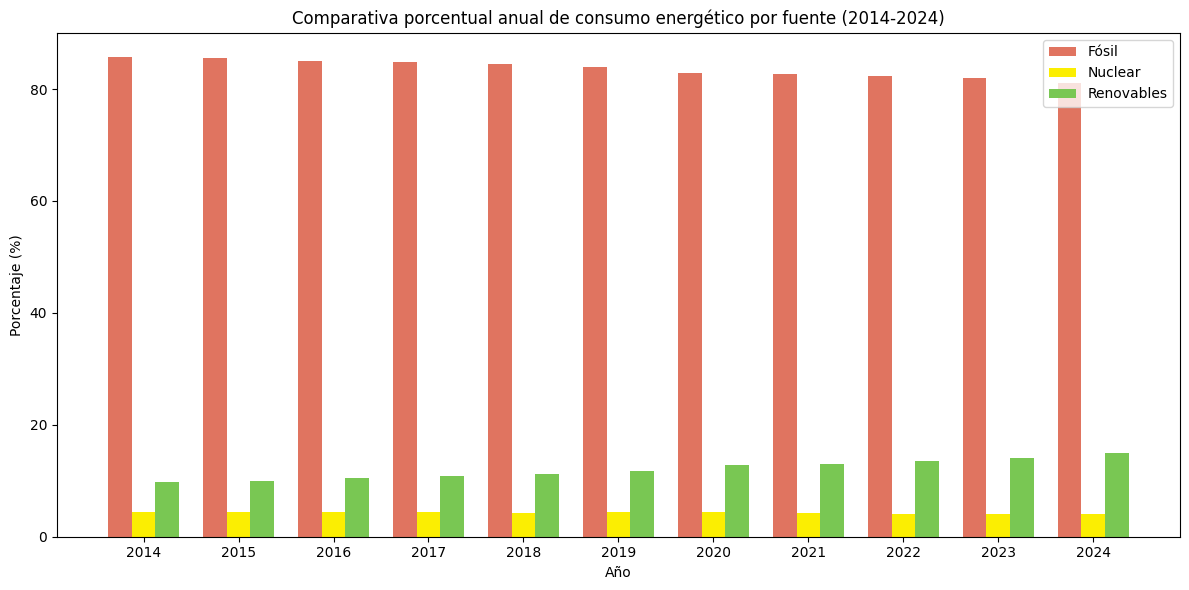

,Año,Fósil,Nuclear,Renovables
0,2014,85.76,4.47,9.77
1,2015,85.50,4.47,10.04
2,2016,85.11,4.44,10.46
3,2017,84.83,4.36,10.81
4,2018,84.45,4.32,11.23
5,2019,83.91,4.40,11.69
6,2020,82.80,4.37,12.84
7,2021,82.77,4.32,12.91
8,2022,82.42,4.03,13.55
9,2023,81.96,4.02,14.02


In [10]:
import pandas as pd

# ... El código para calcular mix_porcentual e index que ya usaste antes

plt.figure(figsize=(12,6))
plt.bar(index - bar_width, mix_porcentual['Fósil'], width=bar_width, label='Fósil', color='#e07460')
plt.bar(index, mix_porcentual['Nuclear'], width=bar_width, label='Nuclear', color='#fbee02')
plt.bar(index + bar_width, mix_porcentual['Renovables'], width=bar_width, label='Renovables', color='#79c753')

plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.title('Comparativa porcentual anual de consumo energético por fuente (2014-2024)')
plt.xticks(index, mix_porcentual['Año'])
plt.legend()
plt.tight_layout()
plt.show()

# Mostramos los valores porcentuales anuales en formato tabla
display(mix_porcentual[['Año', 'Fósil', 'Nuclear', 'Renovables']].round(2))


            country  nuclear_electricity
7404  United States               781.98
1394          China               445.17
2429         France               379.27
5978         Russia               215.71
6391    South Korea               188.74
1154         Canada                86.18
3389          Japan                84.91
6524          Spain                54.82
2969          India                54.70
7224        Ukraine                52.28


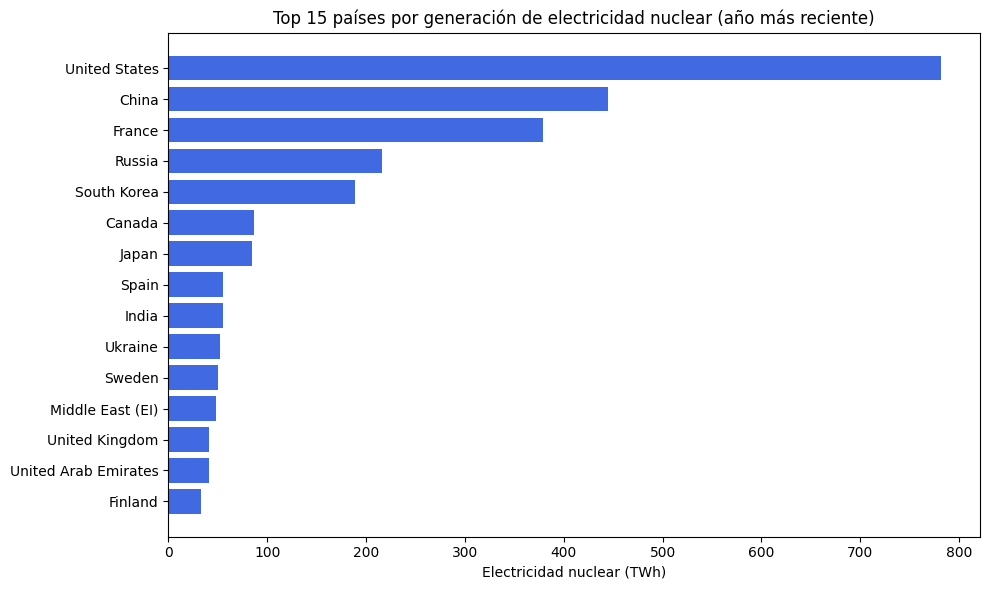

In [18]:
import pandas as pd

# Cambia el nombre si tu archivo es diferente
df = pd.read_csv('datos_nuclear.csv')

agrupaciones = [
    'World', 'High-income countries', 'OECD (EI)', 'Europe', 'Europe (EI)',
    'North America', 'North America (EI)', 'European Union (27)', 'Asia',
    'Asia Pacific (EI)', 'Non-OECD (EI)', 'Upper-middle-income countries', 'CIS (EI)'
]

ultimo_año = df['year'].max()
df_filtrado = df[(df['year'] == ultimo_año) & (~df['country'].isin(agrupaciones))]
ranking = df_filtrado[['country', 'nuclear_electricity']].sort_values('nuclear_electricity', ascending=False)
top15 = ranking.head(15)
print(top10)

import matplotlib.pyplot as plt

# Si tienes el DataFrame top15 definido así:
# top15 = ranking.head(15)

plt.figure(figsize=(10,6))
plt.barh(top15['country'][::-1], top15['nuclear_electricity'][::-1], color='royalblue')
plt.xlabel('Electricidad nuclear (TWh)')
plt.title('Top 15 países por generación de electricidad nuclear (año más reciente)')
plt.tight_layout()
plt.show()



El top 5 países generan el 70.43% de la electricidad nuclear total (excluyendo agrupaciones).


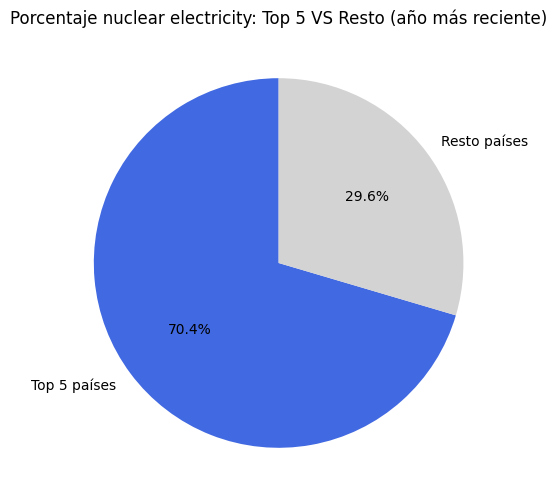

In [20]:
import pandas as pd

# Carga tu DataFrame con los datos nucleares
df = pd.read_csv('datos_nuclear.csv')  # Cambia por el nombre real de tu archivo

agrupaciones = [
    'World', 'High-income countries', 'OECD (EI)', 'Europe', 'Europe (EI)',
    'North America', 'North America (EI)', 'European Union (27)', 'Asia',
    'Asia Pacific (EI)', 'Non-OECD (EI)', 'Upper-middle-income countries', 'CIS (EI)'
]

# Filtrar el año más reciente
ultimo_año = df['year'].max()
df_filtrado = df[(df['year'] == ultimo_año) & (~df['country'].isin(agrupaciones))]

# Ranking por nuclear_electricity descendente
ranking = df_filtrado[['country', 'nuclear_electricity']].sort_values('nuclear_electricity', ascending=False)
top5 = ranking.head(5)

# Suma total (sin agrupaciones)
total_nuclear = df_filtrado['nuclear_electricity'].sum()
porcentaje_top5 = top5['nuclear_electricity'].sum() / total_nuclear * 100

print(f"El top 5 países generan el {porcentaje_top5:.2f}% de la electricidad nuclear total (excluyendo agrupaciones).")

# Visualización (barchart del top 5 vs resto)
import matplotlib.pyplot as plt

valores = [top5['nuclear_electricity'].sum(), total_nuclear - top5['nuclear_electricity'].sum()]
labels = ['Top 5 países', 'Resto países']

plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=['royalblue', 'lightgray'], startangle=90)
plt.title('Porcentaje nuclear electricity: Top 5 VS Resto (año más reciente)')
plt.show()


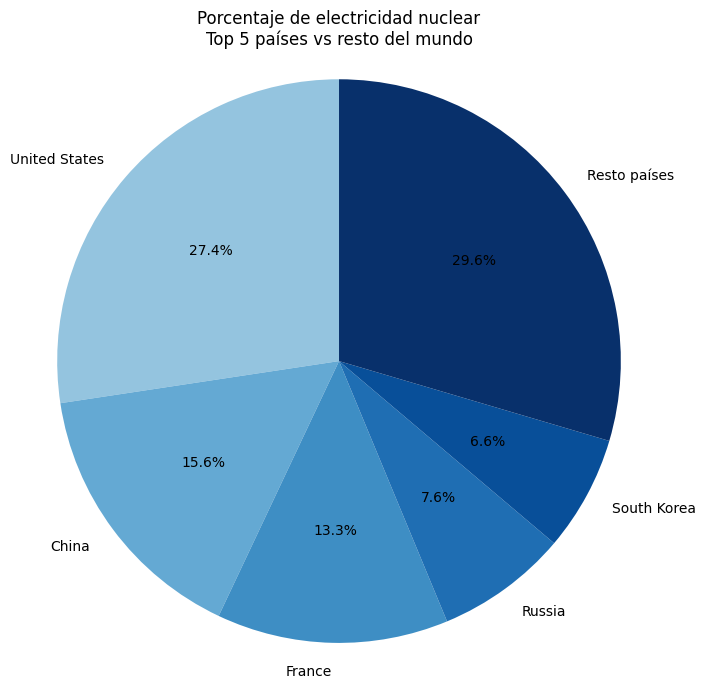

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Suma total nuclear (sin agrupaciones)
total_nuclear = ranking['nuclear_electricity'].sum()
top5_sum = top5['nuclear_electricity'].sum()
resto = total_nuclear - top5_sum

labels = list(top5['country'].values) + ['Resto países']
sizes = list(top5['nuclear_electricity'].values) + [resto]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Blues(np.linspace(0.4, 1, 6)))
plt.title('Porcentaje de electricidad nuclear\nTop 5 países vs resto del mundo')
plt.axis('equal')
plt.show()
